In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dnyaneshwarkhaire","key":"f8f3454bc4c4839643189f19bad4bf19"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d gauravduttakiit/agricultural-pests-dataset
# !kaggle datasets download -d salader/dogs-vs-cats

100% 102M/102M [00:03<00:00, 34.7MB/s] 
100% 102M/102M [00:03<00:00, 33.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/agricultural-pests-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Flatten, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_dir = '/content/train/'
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),  # Resize images to 150x150
    batch_size=16,
    label_mode='int',  # Labels are returned as integers
)

validation_dir = '/content/test'  # Ensure this is your validation directory path
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),  # Resize images to 150x150
    batch_size=16,
    label_mode='int',  # Labels are returned as integers
)


Found 4395 files belonging to 12 classes.
Found 1099 files belonging to 12 classes.


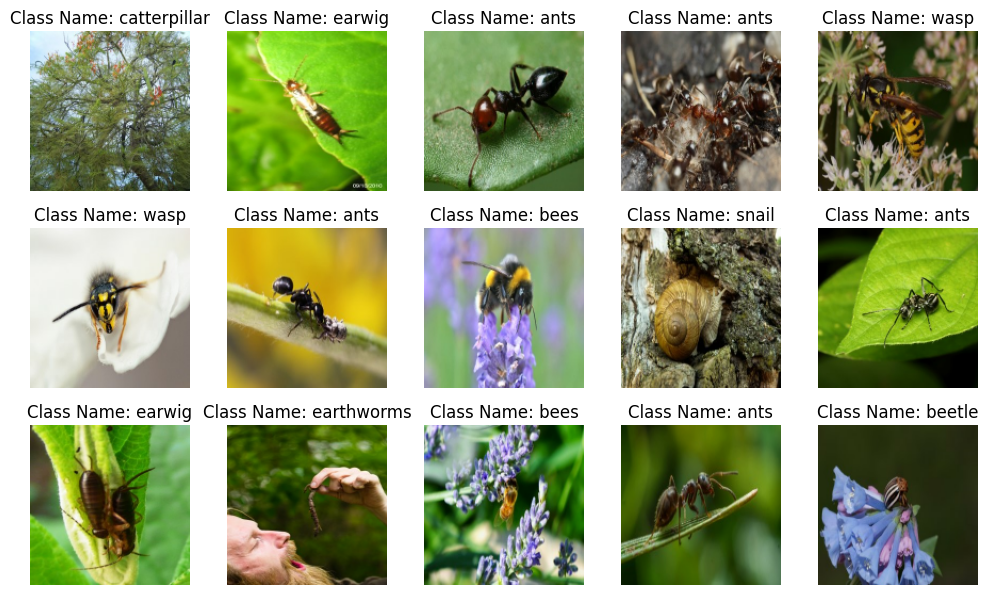

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Shuffle the dataset to ensure randomness
shuffled_dataset = train_dataset.shuffle(buffer_size=len(train_dataset))

# Take a batch of 25 images
batch = shuffled_dataset.take(2)
for images, labels in batch:
    # Display the images and their class names
    plt.figure(figsize=(10, 10))
    for i in range(15):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class Name: {train_dataset.class_names[labels[i].numpy()]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break  # Exit the loop after displaying the images


In [70]:
conv_base = VGG16(weights='imagenet', include_top= False, input_shape=(150,150,3))

In [71]:
conv_base.trainable=False

In [72]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(12,activation = 'softmax'))

In [73]:
model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
# Shuffle the dataset
train_dataset = train_dataset.shuffle(buffer_size=len(train_dataset))
# Define your model and train it using the shuffled dataset
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
275/275 [==============================] - 17s 49ms/step - loss: 0.4385 - accuracy: 0.9067 - val_loss: 3.8945 - val_accuracy: 0.6561
Epoch 2/10
275/275 [==============================] - 16s 47ms/step - loss: 0.4976 - accuracy: 0.8981 - val_loss: 3.8597 - val_accuracy: 0.6579
Epoch 3/10
275/275 [==============================] - 16s 48ms/step - loss: 0.4357 - accuracy: 0.9099 - val_loss: 4.0934 - val_accuracy: 0.6542
Epoch 4/10
275/275 [==============================] - 16s 46ms/step - loss: 0.3360 - accuracy: 0.9210 - val_loss: 3.9035 - val_accuracy: 0.6679
Epoch 5/10
275/275 [==============================] - 16s 47ms/step - loss: 0.3801 - accuracy: 0.9160 - val_loss: 4.4395 - val_accuracy: 0.6715
Epoch 6/10
275/275 [==============================] - 16s 47ms/step - loss: 0.3477 - accuracy: 0.9261 - val_loss: 4.1524 - val_accuracy: 0.6815
Epoch 7/10
275/275 [==============================] - 16s 47ms/step - loss: 0.2409 - accuracy: 0.9315 - val_loss: 4.1350 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'],label = 'train', color='green')
plt.plot(history.history['val_loss'],label = 'val', color='red')
plt.title('VGG16')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'],label = 'train_acc', color='green')
plt.plot(history.history['val_accuracy'],label = 'val_acc', color='red')
plt.legend()
plt.show()

In [7]:

# ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly translate images horizontally
    height_shift_range=0.2,  # Randomly translate images vertically
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Apply zooming
    horizontal_flip=True,  # Apply horizontal flipping
    fill_mode='nearest'  # Fill mode for new pixels
)

# ImageDataGenerator for validation/testing (no augmentation, just rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Setup for the training data loader
train_dir = '/content/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='sparse'  # Use 'sparse' for sparse categorical labels
)

# Setup for the validation data loader
validation_dir = '/content/test'  # Ensure this is your validation directory path
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for sparse categorical labels
)


Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.


In [65]:
# Define your model and train it using the shuffled dataset
history2 = model.fit_generator(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
275/275 [==============================] - 34s 121ms/step - loss: 1.8709 - accuracy: 0.3945 - val_loss: 1.5071 - val_accuracy: 0.5296
Epoch 2/10
275/275 [==============================] - 33s 121ms/step - loss: 1.4322 - accuracy: 0.5338 - val_loss: 1.3390 - val_accuracy: 0.5723
Epoch 3/10
275/275 [==============================] - 34s 125ms/step - loss: 1.2852 - accuracy: 0.5761 - val_loss: 1.1738 - val_accuracy: 0.6251
Epoch 4/10
275/275 [==============================] - 35s 126ms/step - loss: 1.2194 - accuracy: 0.5916 - val_loss: 1.1678 - val_accuracy: 0.6242
Epoch 5/10
275/275 [==============================] - 34s 122ms/step - loss: 1.1523 - accuracy: 0.6232 - val_loss: 1.1743 - val_accuracy: 0.6260
Epoch 6/10
275/275 [==============================] - 33s 121ms/step - loss: 1.1065 - accuracy: 0.6337 - val_loss: 1.0890 - val_accuracy: 0.6397
Epoch 7/10
275/275 [==============================] - 35s 129ms/step - loss: 1.0830 - accuracy: 0.6410 - val_loss: 1.0823 - val_ac

In [ ]:
plt.plot(history2.history['loss'],label = 'train', color='green')
plt.plot(history2.history['val_loss'],label = 'val', color='red')
plt.title('After Data Augmentation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history2.history['accuracy'],label = 'train_acc', color='green')
plt.plot(history2.history['val_accuracy'],label = 'val_acc', color='red')
plt.title('After Data Augmentation')
plt.legend()
plt.show()

In [75]:
history3 = model.fit_generator(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
138/138 [==============================] - 39s 249ms/step - loss: 1.9231 - accuracy: 0.3663 - val_loss: 1.4270 - val_accuracy: 0.5505
Epoch 2/10
138/138 [==============================] - 34s 244ms/step - loss: 1.4218 - accuracy: 0.5329 - val_loss: 1.2216 - val_accuracy: 0.6069
Epoch 3/10
138/138 [==============================] - 32s 230ms/step - loss: 1.2702 - accuracy: 0.5877 - val_loss: 1.2135 - val_accuracy: 0.6206
Epoch 4/10
138/138 [==============================] - 32s 235ms/step - loss: 1.2020 - accuracy: 0.6116 - val_loss: 1.1673 - val_accuracy: 0.6215
Epoch 5/10
138/138 [==============================] - 37s 270ms/step - loss: 1.1518 - accuracy: 0.6212 - val_loss: 1.1007 - val_accuracy: 0.6433
Epoch 6/10
138/138 [==============================] - 39s 281ms/step - loss: 1.1100 - accuracy: 0.6373 - val_loss: 1.0592 - val_accuracy: 0.6524
Epoch 7/10
138/138 [==============================] - 34s 243ms/step - loss: 1.0879 - accuracy: 0.6439 - val_loss: 1.0744 - val_ac

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load pre-trained VGG16 model without top layers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add new top layers
x = GlobalAveragePooling2D()(conv_base.output)  # Use GlobalAveragePooling2D directly
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Create the model
model = Model(inputs=conv_base.input, outputs=x)

# Freeze pre-trained layers
for layer in conv_base.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Extract features from the pre-trained model
train_features = conv_base.predict(train_generator)
train_features_flattened = train_features.reshape(train_features.shape[0], -1)

# Create and train the SVM classifier
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale'))
svm.fit(train_features_flattened, train_generator.classes)


Epoch 1/5
 67/138 [=============>................] - ETA: 10:14 - loss: 12.0750 - accuracy: 0.0344

KeyboardInterrupt: 

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150, 150,3)))
# model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model2.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model2.add(Dense(12,activation = 'softmax'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
model.compile(optimizer= 'rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,validation_data=validation_generator,epochs=30)

In [ ]:
jj

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.show()

In [ ]:
import cv2

In [ ]:
test_image= cv2.imread('/content/Labrador_Retriever_portrait.jpg')
plt.imshow(test_image)
test_image = cv2.resize(test_image, (256,256))
test_input = test_image.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

In [ ]:
test_image= cv2.imread('/content/images.jpg')
plt.imshow(test_image)
test_image = cv2.resize(test_image, (256,256))
test_input = test_image.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

In [ ]:
test_image= cv2.imread('/content/cat.jpeg')
plt.imshow(test_image)
test_image = cv2.resize(test_image, (256,256))
test_input = test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

In [ ]:
test_image= cv2.imread('/content/dog.jpg')
plt.imshow(test_image)
test_image = cv2.resize(test_image, (256,256))
test_input = test_image.reshape((1,256,256,3))

In [ ]:
test_image.shape

In [ ]:
test_input.shape

In [ ]:
model.predict(test_input)

In [ ]:
model = ResNet50(weights = 'imagenet')

In [ ]:
img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
pred = model.predict(x)

In [ ]:
print("Predicted: " ,decode_predictions(pred, top=1)[0])